# ***Anylitical Photogrammetry HomeWork 7***

KNTU G.E engineering faculty _ 2023 January

*By : Hasti Rafiei Nia*

*Student Code : 9926683*

In [18]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display_html

In [19]:
df = pd.read_excel('Homework7.xlsx')
x = df['x']
y = df['y']
E = df['E']
N = df['N']
df

,x,y,E,N
0,103.0,-100.1,500083.4,5003683.5
1,0.8,-69.1,504092.3,5002499.5
2,-20.0,-69.0,504907.5,5002499.5
3,-60.0,-47.0,506493.3,5001673.5
4,-102.0,-47.2,508101.3,5001651.0
5,-101.7,10.8,508090.1,4999384.0
6,-86.0,75.8,507475.9,4996849.0
7,-40.0,45.7,505689.2,4998022.0
8,11.0,36.8,503679.2,4998368.0
9,63.0,34.0,501657.9,4998479.5


In [20]:
def calc_X (A, L):
    X = np.linalg.inv((A.T) @ A) @ A.T @ L
    return (X)

def linear (x, y, E, N, Xx, Xy, c):
    Ecom, Ncom = [], []

    for i in range(len(x)):
        Ecom.append(Xx[0] + Xx[1] * x[i] + Xx[2] * y[i])
        Ncom.append(Xy[0] + Xy[1] * x[i] + Xy[2] * y[i])

    if c==0:
        return (Ecom, Ncom)
    else:
        dX = (np.array(E) - np.array(Ecom))
        dY = (np.array(N) - np.array(Ncom))
        return (dX, dY)

def dist (Egcp_gp, Ngcp_gp, Eicp_gp, Nicp_gp, sort):
    dists = {}
    for i in range(len(Egcp_gp)):
        dists.update({i+1: np.sqrt((Egcp_gp[i] - Eicp_gp)**2 + ((Ngcp_gp[i] - Nicp_gp)**2))})
    sorted_dists = sorted(dists.items(), key=lambda item: item[1])
    if (sort == 'None'):
        return (dists)
    else:
        return (sorted_dists)

def weighted_average (num, w_dict, indexes, sorted_indexes, dX_dict, dY_dict, n):
    dXu_num, dYu_num, denom = 0, 0, 0
    for i in range(num):
        dXu_num += (w_dict.get(sorted_indexes[i])*dX_dict.get(sorted_indexes[i]))
        dYu_num += (w_dict.get(sorted_indexes[i])*dY_dict.get(sorted_indexes[i]))
        denom += w_dict.get(sorted_indexes[i])

    if n == 0:
        return (dXu_num/denom)
    else:
        return (dYu_num/denom)

def moving_average (num, dX_dict, dY_dict, E_dict, N_dict, Eicp_gp, Nicp_gp, sorted_indexes, d):
    LX_gp, LY_gp, Egcp, Ngcp = [], [], [], []
    for i in range(num):
        LX_gp.append(dX_dict.get(sorted_indexes[i]))
        LY_gp.append(dY_dict.get(sorted_indexes[i]))
        Egcp.append(E_dict.get(sorted_indexes[i]))
        Ngcp.append(N_dict.get(sorted_indexes[i]))

    A = np.zeros((num, 3))
    A[:, 0] = 1
    A[:, 1] = Egcp
    A[:, 2] = Ngcp

    a = calc_X(A, LX_gp)
    b = calc_X(A, LY_gp)

    dX = a[0] + a[1]*Eicp_gp + a[2]*Nicp_gp
    dY = b[0] + b[1]*Eicp_gp + b[2]*Nicp_gp
 
    X = Eicp_gp + dX
    Y = Nicp_gp + dY

    if d == 'None':
        return (X, Y)
    else:
        return (dX, dY)

def RMSE(dX, dY, c):
    dr, tan = [], []
    dr.clear()
    tan.clear()

    for i in range(len(dX)):
        dr.append(((dX[i])**2 + (dY[i])**2)**(0.5))
        tan.append((dY[i])/dX[i])

    def power(my_list):
        return [ x**2 for x in my_list ]

    RMSE = (sum(power(dr))/2)**(0.5)
  
    if c == 0:
        return (RMSE)
    else:
        d = np.array([dr, tan]).T
        return (d)

def neighboring (Eicp, Nicp, Egcp, Ngcp, shape):
    q1, q2, q3, q4 = [], [], [], []

    for i in range(10):
        if (Eicp < Egcp[i]) and (Nicp < Ngcp[i]):
            q1.append((Egcp[i], Ngcp[i]))
        elif (Eicp < Egcp[i]) and (Nicp > Ngcp[i]):
            q2.append((Egcp[i], Ngcp[i]))
        elif (Eicp > Egcp[i]) and (Nicp > Ngcp[i]):
            q3.append((Egcp[i], Ngcp[i]))
        else:
            q4.append((Egcp[i], Ngcp[i]))

    if (shape == 'None'):
        return (q1, q2, q3, q4)
    else:
        return (len(q1), len(q2), len(q3), len(q4))

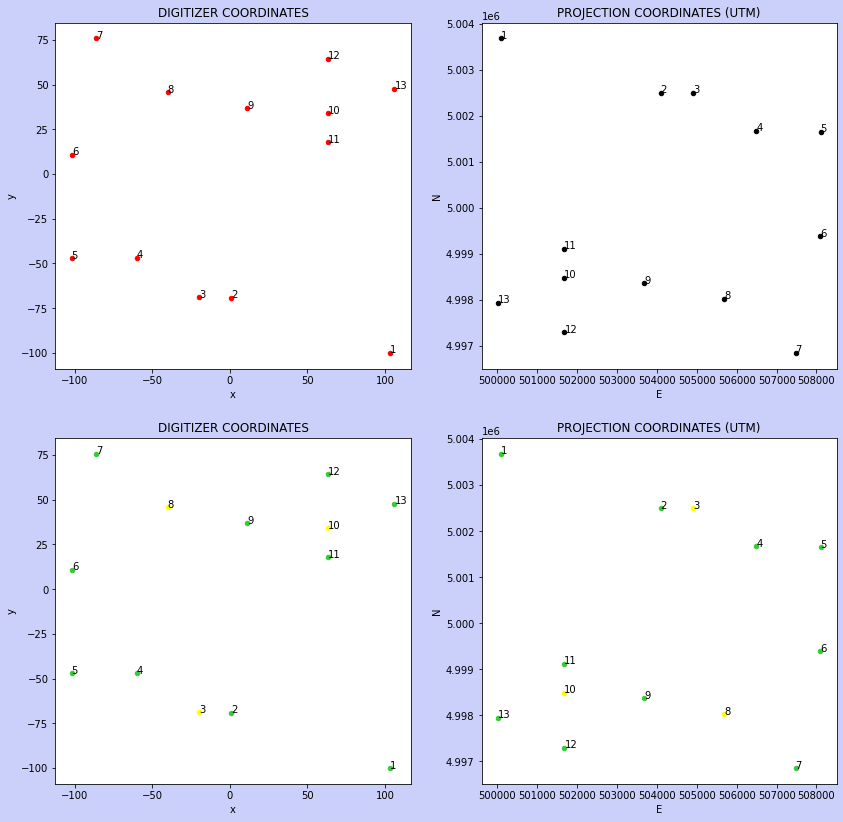

In [21]:
xgcps, ygcps, Egcps, Ngcps, xicps, yicps, Eicps, Nicps = [], [], [], [], [], [], [], []

for i in range(len(x)):
    if (i == 2 or i == 7 or i == 9):
        xicps.append(x[i])
        yicps.append(y[i])
        Eicps.append(E[i])
        Nicps.append(N[i])
    else:
        xgcps.append(x[i])
        ygcps.append(y[i])
        Egcps.append(E[i])
        Ngcps.append(N[i])

fig = plt.figure(figsize = (14, 14))
rows = 2
columns = 2

fig.patch.set_facecolor('#CAD0FA')

annotations = list(range(1, 14))

fig.add_subplot(rows, columns, 1)
plt.scatter(x, y, s = 20, color = "red")
plt.title("DIGITIZER COORDINATES")
plt.xlabel("x")
plt.ylabel("y")

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

fig.add_subplot(rows, columns, 2)
plt.scatter(E, N, s = 20, color = "black")
plt.title("PROJECTION COORDINATES (UTM)")
plt.xlabel("E")
plt.ylabel("N")

for i, label in enumerate(annotations):
    plt.annotate(label, (E[i], N[i]))

annotations = list(range(1, 14))

fig.add_subplot(rows, columns, 3)
plt.scatter(xgcps, ygcps, s = 20, color = "limegreen")
plt.scatter(xicps, yicps, s = 20, color = "yellow")
plt.title("DIGITIZER COORDINATES")
plt.xlabel("x")
plt.ylabel("y")

for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

fig.add_subplot(rows, columns, 4)
plt.scatter(Egcps, Ngcps, s = 20, color = "limegreen")
plt.scatter(Eicps, Nicps, s = 20, color = "yellow")
plt.title("PROJECTION COORDINATES (UTM)")
plt.xlabel("E")
plt.ylabel("N")

for i, label in enumerate(annotations):
    plt.annotate(label, (E[i], N[i]))

In [22]:
LX = (np.array(Egcps))
LY = (np.array(Ngcps))

Al = np.zeros((10, 3))

Al[:, 0] = 1
Al[:, 1] = np.array(xgcps).T
Al[:, 2] = np.array(ygcps).T

sp.Matrix(Al)


Matrix([
[1.0,  103.0, -100.1],
[1.0,    0.8,  -69.1],
[1.0,  -60.0,  -47.0],
[1.0, -102.0,  -47.2],
[1.0, -101.7,   10.8],
[1.0,  -86.0,   75.8],
[1.0,   11.0,   36.8],
[1.0,   63.0,   17.7],
[1.0,   63.0,   64.3],
[1.0,  106.0,   47.7]])

In [23]:
Xxl = calc_X(Al, LX)
sp.Matrix(Xxl)

Matrix([
[  504125.763670734],
[ -39.0244938826606],
[0.0590038444097445]])

In [24]:
Xyl = calc_X(Al, LY)
sp.Matrix(Xyl)

Matrix([
[   4999806.22066077],
[-0.0886060680895753],
[  -38.9841198696886]])

In [25]:
Ecom_gcp, Ncom_gcp = linear(xgcps, ygcps, Egcps, Ngcps, Xxl, Xyl, 0)
dX_gcp, dY_gcp = linear(xgcps, ygcps, Egcps, Ngcps, Xxl, Xyl , 1)

computed_gcp = np.array([[Ecom_gcp, Ncom_gcp, dX_gcp, dY_gcp]]).T
print(computed_gcp)

[[[ 5.00100335e+05]
  [ 5.00369940e+06]
  [-1.69345160e+01]
  [-1.59046347e+01]]

 [[ 5.04090467e+05]
  [ 5.00249995e+06]
  [ 1.83309002e+00]
  [-4.52458915e-01]]

 [[ 5.06464460e+05]
  [ 5.00164379e+06]
  [ 2.88398770e+01]
  [ 2.97093413e+01]]

 [[ 5.08103477e+05]
  [ 5.00165531e+06]
  [-2.17706531e+00]
  [-4.30893757e+00]]

 [[ 5.08095192e+05]
  [ 4.99939420e+06]
  [-5.09194012e+00]
  [-1.02034033e+01]]

 [[ 5.07486343e+05]
  [ 4.99685884e+06]
  [-1.04426360e+01]
  [-9.84449651e+00]]

 [[ 5.03698666e+05]
  [ 4.99837063e+06]
  [-1.94655795e+01]
  [-2.63038282e+00]]

 [[ 5.01668265e+05]
  [ 4.99911062e+06]
  [ 8.35075828e-01]
  [ 5.38044321e+00]]

 [[ 5.01671015e+05]
  [ 4.99729396e+06]
  [ 9.28549668e+00]
  [ 2.04042914e+00]]

 [[ 4.99991982e+05]
  [ 4.99793729e+06]
  [ 1.33181974e+01]
  [ 6.21410023e+00]]]


In [26]:
Eicps_gp, Nicps_gp = linear(xicps, yicps, Egcps, Ngcps, Xxl, Xyl, 0)
distance = np.zeros((3, 10))
for i in range(3):
    for j in range(10):
        distance[i][:] = list(dist(Ecom_gcp, Ncom_gcp, Eicps_gp[i], Nicps_gp[i], 'None').values())

distance_df = pd.DataFrame(distance)
distance_df.columns = [f'GCP No.{i}' for i in range(1, 11)]
distance_df.index = ['ICP No. 1', 'ICP No. 2', 'ICP No. 3']
distance_df.style.set_table_attributes("style='display:inline'").set_caption("DISTANCES")


,GCP No.1,GCP No.2,GCP No.3,GCP No.4,GCP No.5,GCP No.6,GCP No.7,GCP No.8,GCP No.9,GCP No.10
ICP No. 1,4949.885094,811.717975,1780.508293,3310.323702,4452.889505,6202.966908,4299.160688,4683.147480,6125.472271,6701.435880
ICP No. 2,7962.459881,4749.038695,3697.731730,4357.013045,2766.520157,2143.881948,2020.011730,4164.312739,4084.952622,5698.183260
ICP No. 3,5454.719275,4696.936280,5747.553161,7177.242378,6491.350891,6037.497268,2032.130042,635.441882,1181.220185,1761.385462


In [27]:
distance_sorted = np.zeros((3, 10))
for i in range(3):
    for j in range(10):
        distance_sorted[i][:] = list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[i], Nicps_gp[i], 'Sorted')))[1])

distance_sorted_df1 = pd.DataFrame(distance_sorted[0][:])
distance_sorted_df2 = pd.DataFrame(distance_sorted[1][:])
distance_sorted_df3 = pd.DataFrame(distance_sorted[2][:])

distance_sorted_df1.index = [f'GCP No. {i}' for i in(list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[0], Nicps_gp[0], 'Sorted'))))[0])]
distance_sorted_df2.index = [f'GCP No. {i}' for i in(list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[1], Nicps_gp[1], 'Sorted'))))[0])]
distance_sorted_df3.index = [f'GCP No. {i}' for i in(list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[2], Nicps_gp[2], 'Sorted'))))[0])]

distance_sorted_df1.columns = ['ICP No. 1']
distance_sorted_df2.columns = ['ICP No. 2']
distance_sorted_df3.columns = ['ICP No. 3']

df1_styler = distance_sorted_df1.style.set_table_attributes("style='display:inline'").set_caption(' ')
df2_styler = distance_sorted_df2.style.set_table_attributes("style='display:inline'").set_caption('DISTANCES (SORTED)')
df3_styler = distance_sorted_df3.style.set_table_attributes("style='display:inline'").set_caption(' ')

space = "\xa0" * 10
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_()+space+df3_styler._repr_html_(), raw=True)

,ICP No. 1
GCP No. 2,811.717975
GCP No. 3,1780.508293
GCP No. 4,3310.323702
GCP No. 7,4299.160688
GCP No. 5,4452.889505
GCP No. 8,4683.147480
GCP No. 1,4949.885094
GCP No. 9,6125.472271
GCP No. 6,6202.966908
GCP No. 10,6701.435880


In [28]:
dXgcp_dict, dYgcp_dict, Egcp_dict, Ngcp_dict, Eicp_dict, Nicp_dict, w_dict = {}, {}, {}, {}, {}, {}, {}
unsorted_dists = dist(Ecom_gcp, Ncom_gcp, Eicps_gp[0], Nicps_gp[0], 'None')

for i in range(len(dX_gcp)):
    dXgcp_dict.update({i+1: dX_gcp[i]})
    dYgcp_dict.update({i+1: dY_gcp[i]})
    Egcp_dict.update({i+1: Ecom_gcp[i]})
    Ngcp_dict.update({i+1: Ncom_gcp[i]})
    w_dict.update({i+1: 1/(unsorted_dists.get(i+1)**2)})

    wda1, wda2, wda3 = np.zeros((2, 10)), np.zeros((2, 10)), np.zeros((2, 10))

for i in range(2):
    for j in range(10):
        wda1[i][j] = weighted_average(j+1, w_dict, list(range(1, 11)), list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[0], Nicps_gp[0], 'Sorted'))))[0], dXgcp_dict, dYgcp_dict, i)
        wda2[i][j] = weighted_average(j+1, w_dict, list(range(1, 11)), list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[1], Nicps_gp[1], 'Sorted'))))[0], dXgcp_dict, dYgcp_dict, i)
        wda3[i][j] = weighted_average(j+1, w_dict, list(range(1, 11)), list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[2], Nicps_gp[2], 'Sorted'))))[0], dXgcp_dict, dYgcp_dict, i)

In [29]:
temp_list, final_wda_x, final_wda_y = [wda1, wda2, wda3], [], []

for i in range(3):
    temp_df = pd.DataFrame(temp_list[i])
    temp_df.index = [f'ICP No. {i+1} dXu', f'ICP No. {i+1} dYu']
    temp_df.columns = [f'n = {j}' for j in range(1, 11)]
    display(temp_df)

print("")

for i in range(3):
    final_wda_x.append(temp_list[i][0]+Eicps_gp[i])
    final_wda_y.append(temp_list[i][1]+Nicps_gp[i])

list_temp, index = [], []

for i in range(3):
    temp = np.concatenate((final_wda_x, final_wda_y), axis=1)
    list_temp.append(temp[i][0:10])
    list_temp.append(temp[i][10:20])
    index.append(f'ICP No. {i+1} (E)')
    index.append(f'ICP No. {i+1} (N)')
  
weighted_df = pd.DataFrame(list_temp)
pd.options.display.float_format = '{:,.7f}'.format
weighted_df.index = index
weighted_df.columns = [f'n = {j}' for j in range(1, 11)]
display(weighted_df)

,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 1 dXu,1.833090,6.480243,6.069713,5.371424,5.111337,5.017350,4.593806,4.652182,4.471227,4.561169
ICP No. 1 dYu,-0.452459,4.737589,4.308601,4.118848,3.762841,3.798394,3.418240,3.401097,3.242310,3.272522


,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 2 dXu,-19.465579,-16.537730,-12.115302,16.852879,16.426144,15.054335,12.474275,4.881937,4.969332,4.561169
ICP No. 2 dYu,-2.630383,-4.971287,-6.992873,18.967126,18.012605,16.901141,13.725353,3.609681,3.636662,3.272522


,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 3 dXu,0.835076,3.952373,6.158917,-3.169639,1.386901,0.948877,5.298682,5.098976,4.854118,4.561169
ICP No. 3 dYu,5.380443,4.148337,4.635021,1.990063,-0.234612,-0.609248,4.119158,3.942005,3.602131,3.272522


,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 1 (E),"504,904.0153731","504,908.6625265","504,908.2519960","504,907.5537068","504,907.2936203","504,907.1996335","504,906.7760895","504,906.8344649","504,906.6535098","504,906.7434519"
ICP No. 1 (N),"5,002,497.4445942","5,002,502.6346419","5,002,502.2056546","5,002,502.0159009","5,002,501.6598946","5,002,501.6954474","5,002,501.3152930","5,002,501.2981499","5,002,501.1393631","5,002,501.1695756"
ICP No. 2 (E),"505,669.9743222","505,672.9021721","505,677.3245996","505,706.2927808","505,705.8660453","505,704.4942365","505,701.9141765","505,694.3218390","505,694.4092342","505,694.0010705"
ICP No. 2 (N),"4,998,025.5602426","4,998,023.2193389","4,998,021.1977521","4,998,047.1577510","4,998,046.2032303","4,998,045.0917664","4,998,041.9159783","4,998,031.8003066","4,998,031.8272870","4,998,031.4631479"
ICP No. 3 (E),"501,670.0617627","501,673.1790597","501,675.3856039","501,666.0570479","501,670.6135877","501,670.1755634","501,674.5253692","501,674.3256633","501,674.0808044","501,673.7878556"
ICP No. 3 (N),"4,998,480.5588461","4,998,479.3267399","4,998,479.8134240","4,998,477.1684656","4,998,474.9437905","4,998,474.5691551","4,998,479.2975611","4,998,479.1204080","4,998,478.7805338","4,998,478.4509253"


In [30]:
ds_mav, index2, final_mav = [], [], []

for i in range(3):
    temp = []
    index2.append(f'ICP No. {i+1} (dXu)')
    index2.append(f'ICP No. {i+1} (dYu)')
    for j in range(2, 11):
        temp.append(moving_average(j, dXgcp_dict, dYgcp_dict, Egcp_dict, Ngcp_dict, Eicps_gp[i], Nicps_gp[i], list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[i], Nicps_gp[i], 'Sorted'))))[0], 'd'))
    ds_mav.append(list(zip(*temp))[0])
    ds_mav.append(list(zip(*temp))[1])

for i in range(3):
    temp = []
    for j in range(2, 11):
        temp.append(moving_average(j, dXgcp_dict, dYgcp_dict, Egcp_dict, Ngcp_dict, Eicps_gp[i], Nicps_gp[i], list(list(zip(*dist(Ecom_gcp, Ncom_gcp, Eicps_gp[i], Nicps_gp[i], 'Sorted'))))[0], 'None'))
    final_mav.append(list(zip(*temp))[0])
    final_mav.append(list(zip(*temp))[1])


ds_mav_df = pd.DataFrame(ds_mav)
ds_mav_df.index = index2
ds_mav_df.columns = [f'n = {j}' for j in range(2, 11)]

final_mav_df = pd.DataFrame(final_mav)
final_mav_df.index = index
final_mav_df.columns = [f'n = {j}' for j in range(2, 11)]

display(ds_mav_df)
print("")
display(final_mav_df)

,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 1 (dXu),4.7551777,-12.8884104,10.0044184,10.2922454,12.4817367,2.1569366,0.1549350,0.6750112,-0.0000000
ICP No. 1 (dYu),4.0748332,-16.5936604,7.3584954,9.9704068,10.5531975,0.0995858,-0.2114900,0.3149516,0.0000000
ICP No. 2 (dXu),-14.9561861,-14.0884653,-13.0249846,-4.8097366,-5.3688754,-6.2035734,-5.1281786,-4.2450425,0.0000000
ICP No. 2 (dYu),-7.1876292,-6.2917588,-5.2051435,-4.0390433,-4.5426996,-5.5185841,-4.1256450,-3.9868780,0.0000000
ICP No. 3 (dXu),2.4450725,3.7909098,0.4434565,3.6623779,1.6234083,2.3134037,-0.2708884,-0.1702350,0.0000000
ICP No. 3 (dYu),3.2247488,4.2121551,3.5461780,3.1224668,2.0662785,2.5701243,-0.5382874,-0.3369361,0.0000000


,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
ICP No. 1 (E),"504,906.9374609","504,889.2938727","504,912.1867015","504,912.4745285","504,914.6640199","504,904.3392197","504,902.3372181","504,902.8572944","504,902.1822831"
ICP No. 1 (N),"5,002,501.9718863","5,002,481.3033928","5,002,505.2555485","5,002,507.8674600","5,002,508.4502506","5,002,497.9966389","5,002,497.6855631","5,002,498.2120047","5,002,497.8970531"
ICP No. 2 (E),"505,674.4837156","505,675.3514364","505,676.4149171","505,684.6301652","505,684.0710263","505,683.2363284","505,684.3117231","505,685.1948593","505,689.4399017"
ICP No. 2 (N),"4,998,021.0029963","4,998,021.8988666","4,998,022.9854819","4,998,024.1515822","4,998,023.6479259","4,998,022.6720414","4,998,024.0649805","4,998,024.2037474","4,998,028.1906255"
ICP No. 3 (E),"501,671.6717593","501,673.0175966","501,669.6701434","501,672.8890648","501,670.8500951","501,671.5400905","501,668.9557985","501,669.0564519","501,669.2266868"
ICP No. 3 (N),"4,998,478.4031517","4,998,479.3905580","4,998,478.7245809","4,998,478.3008697","4,998,477.2446815","4,998,477.7485272","4,998,474.6401155","4,998,474.8414669","4,998,475.1784029"


In [31]:
Eicps_arr, Nicps_arr = np.ones((3, 10)), np.ones((3, 10))

for i in range(3):
  for j in range(10):
    Eicps_arr[i, j] = Eicps[i]
    Nicps_arr[i, j] = Nicps[i] 

dX_pwp_wda, dY_pwp_wda, RMSE_pwp_wda = Eicps_arr.T - np.array(final_wda_x).T, Nicps_arr.T - np.array(final_wda_y).T, np.zeros((10, 1))

for i in range(10):
  RMSE_pwp_wda[i][0] = RMSE(dX_pwp_wda[i, :], dY_pwp_wda[i, :], 0)

RMSE_wda_df = pd.DataFrame(RMSE_pwp_wda.T)
RMSE_wda_df.columns = [f'n = {j}' for j in range(1, 11)]
RMSE_wda_df.index = ['RMSE']
RMSE_wda_df.style.set_table_attributes("style='display:inline'").set_caption("RMSE Values Through Weighted Distance Average (First Method)")

,n = 1,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
RMSE,16.548398,15.996298,15.089721,22.398457,22.920030,21.760701,20.476324,14.069507,13.954422,13.592016


In [32]:
x_pwp_mav, y_pwp_mav = np.zeros((3, 9)), np.zeros((3, 9))

Eicps_arr_mav, Nicps_arr_mav = np.ones((3, 9)), np.ones((3, 9))

for i in range(3):
    for j in range(9):
        Eicps_arr_mav[i, j] = Eicps[i]
        Nicps_arr_mav[i, j] = Nicps[i] 

x_pwp_mav[0, :], x_pwp_mav[1, :], x_pwp_mav[2, :] = final_mav[0], final_mav[2], final_mav[4]
y_pwp_mav[0, :], y_pwp_mav[1, :], y_pwp_mav[2, :] = final_mav[1], final_mav[3], final_mav[5]

dX_pwp_mav, dY_pwp_mav, RMSE_pwp_mav = Eicps_arr_mav.T - np.array(x_pwp_mav).T, Nicps_arr_mav.T - np.array(y_pwp_mav).T, np.zeros((9, 1))

for i in range(9):
    RMSE_pwp_mav[i][0] = RMSE(dX_pwp_mav[i, :], dY_pwp_mav[i, :], 0)

RMSE_mav_df = pd.DataFrame(RMSE_pwp_mav.T)
RMSE_mav_df.columns = [f'n = {j}' for j in range(2, 11)]
RMSE_mav_df.index = ['RMSE']
RMSE_mav_df.style.set_table_attributes("style='display:inline'").set_caption("RMSE Values Through Moving Average (First Method)")

,n = 2,n = 3,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10
RMSE,14.402329,23.269360,13.391389,13.160224,12.908207,10.894663,10.098392,9.753965,10.397091


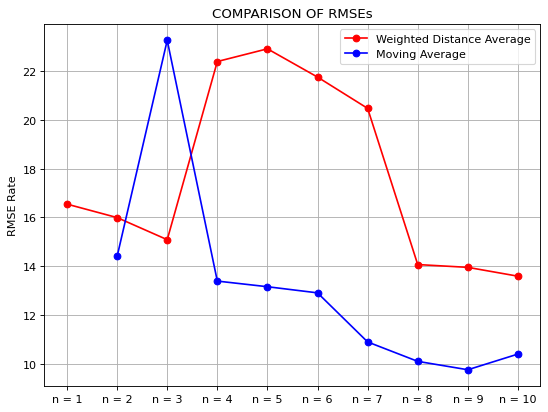

In [33]:
plt.figure(figsize=(8, 6), dpi=80)

names_1 = [f'n = {i}' for i in range(1, 11)]
names_2 = [f'n = {i}' for i in range(2, 11)]

plt.plot(names_1,RMSE_pwp_wda, color='red', marker='o', label = 'Weighted Distance Average')
plt.plot(names_2,RMSE_pwp_mav, color='blue', marker='o', label = 'Moving Average')
plt.ylabel('RMSE Rate')
plt.title('COMPARISON OF RMSEs')
plt.grid(True)
plt.legend(loc='best')
plt.show()